In [18]:
# Import libraries
import pandas as pd
import sys
import matplotlib.pyplot as plt
import os

In [48]:
# 2023 algo for output csv file

import pandas as pd
import os

# Initialize an empty DataFrame to store the concatenated data for 2019
df_combined = pd.DataFrame()

# Initialize an empty DataFrame to store the concatenated data for 2023
df_combined_2023 = pd.DataFrame()

def data_exploration(df_combined, months_folders, output_csv_path):

    # Initialize a counter to track the number of NaN values replaced
    nan_replaced_count = 0

    for month_folder in months_folders:
        # Define the path to the input CSV file
        input_csv_path = os.path.join(month_folder, 'listings.csv')
        
        # Read the CSV file into a Pandas DataFrame
        df = pd.read_csv(input_csv_path)
        
        # Filter the DataFrame to include only the columns that are present in the file
        columns_to_keep = [col for col in columns_to_select if col in df.columns]
        df_selected = df[columns_to_keep]
        
        # Initialize a set to store columns from other CSV files
        additional_columns = set()
        
        # Iterate over all CSV files in the folder
        for filename in os.listdir(month_folder):
            if filename.endswith('.csv') and filename != 'listings.csv':  # Check if it's a CSV file and not the original file
                file_path = os.path.join(month_folder, filename)
                other_df = pd.read_csv(file_path)

                # Iterate over each column in the other DataFrame
                for col in other_df.columns:
                    # If the column is not already in the selected DataFrame and it's in the columns_to_select list, add it
                    if col not in df_selected.columns and col in columns_to_select:
                        additional_columns.add(col)
                        # Add the column and its data to the selected DataFrame
                        df_selected[col] = other_df[col]

                    elif  col in df_selected.columns and col in columns_to_select:
                        # Check if any value in the selected DataFrame for this column is NaN
                        nan_mask = df_selected[col].isna()
                        
                        # Check if the corresponding value in the other DataFrame is not NaN
                        non_nan_mask = ~other_df[col].isna()
                        
                        # Update the selected DataFrame where NaN values are found
                        df_selected.loc[nan_mask & non_nan_mask, col] = other_df.loc[nan_mask & non_nan_mask, col]
                        # print(f"NaN values in column '{col}' replaced with non-NaN values.")

                        # Count the number of NaN values replaced
                        nan_replaced_count += sum(nan_mask & non_nan_mask)

        # Concatenate the current month's DataFrame with the overall concatenated DataFrame
        df_combined = pd.concat([df_combined, df_selected], ignore_index=True)

    # Write the concatenated DataFrame to the output CSV file
    df_combined.to_csv(output_csv_path, index=False)

    print(f"Data from all months has been written to {output_csv_path}")
    print(f"The output CSV file has {df_selected.shape[1]} columns.")
    # Print the columns that have been added to the output file
    print("Columns added to the output file:")
    for col in df_selected.columns:
        print(col)

    # Print the number of NaN values replaced
    print(f"Number of NaN values replaced: {nan_replaced_count}")

    return df_combined

# Define the columns you want to select
columns_to_select = ['id', 'zipcode', 'transit', 'bedrooms', 'beds', 'review_scores_rating', 'number_of_reviews',
                        'neighbourhood', 'name', 'latitude', 'longitude', 'last_review', 'instant_bookable', 'host_since',
                        'host_response_rate','host_identity_verified', 'host_has_profile_pic', 'first_review', 'description','city',
                        'cancellation_policy', 'bed_type', 'bathrooms', 'accommodates', 'amenities', 'room_type',
                        'property_type', 'price', 'availability_365', 'minimum_nights', 'last_scraped']

# 2019 #
# Iterate over each month's folder
months_folders = ['data/2019/april', 'data/2019/febrouary', 'data/2019/march']
# Define the path to the output CSV file
output_csv_path = 'data_train/train_2019.csv'

df_combined = data_exploration(df_combined, months_folders, output_csv_path)

# 2023 #
# Iterate over each month's folder
months_folders = ['data/2023/june', 'data/2023/march', 'data/2023/september']
# Define the path to the output CSV file
output_csv_path = 'data_train/train_2023.csv'

df_combined_2023 = data_exploration(df_combined_2023, months_folders, output_csv_path)

C:\Users\Erik Kajacka\AppData\Local\Temp\ipykernel_11152\2489628748.py:22: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_csv_path)
C:\Users\Erik Kajacka\AppData\Local\Temp\ipykernel_11152\2489628748.py:22: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_csv_path)
C:\Users\Erik Kajacka\AppData\Local\Temp\ipykernel_11152\2489628748.py:22: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_csv_path)


Data from all months has been written to data_train/train_2019.csv
The output CSV file has 31 columns.
Columns added to the output file:
id
zipcode
transit
bedrooms
beds
review_scores_rating
number_of_reviews
neighbourhood
name
latitude
longitude
last_review
instant_bookable
host_since
host_response_rate
host_identity_verified
host_has_profile_pic
first_review
description
city
cancellation_policy
bed_type
bathrooms
accommodates
amenities
room_type
property_type
price
availability_365
minimum_nights
last_scraped
Number of NaN values replaced: 261
Data from all months has been written to data_train/train_2023.csv
The output CSV file has 26 columns.
Columns added to the output file:
id
bedrooms
beds
review_scores_rating
number_of_reviews
neighbourhood
name
latitude
longitude
last_review
instant_bookable
host_since
host_response_rate
host_identity_verified
host_has_profile_pic
first_review
description
bathrooms
accommodates
amenities
room_type
property_type
price
availability_365
minimum_n

In [49]:
# check for extreme values (logiko mono arithimitikes times px bathrooms,types,beds klp)
bedrooms_stats = df_combined['bedrooms'].describe()
filtered_column = df_combined.loc[df_combined['bedrooms'] > 40, ['id','bedrooms']]
print(filtered_column)
# Print the descriptive statistics
#print(bedrooms_stats)

Empty DataFrame
Columns: [id, bedrooms]
Index: []


In [50]:
# 2019 answers
# 1.1

most_common_room_type = df_combined['room_type'].value_counts().idxmax()

print(most_common_room_type)

Entire home/apt


C:\Users\Erik Kajacka\AppData\Local\Temp\ipykernel_11152\2407273677.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg_price = df_combined.groupby('month')['price'].mean()


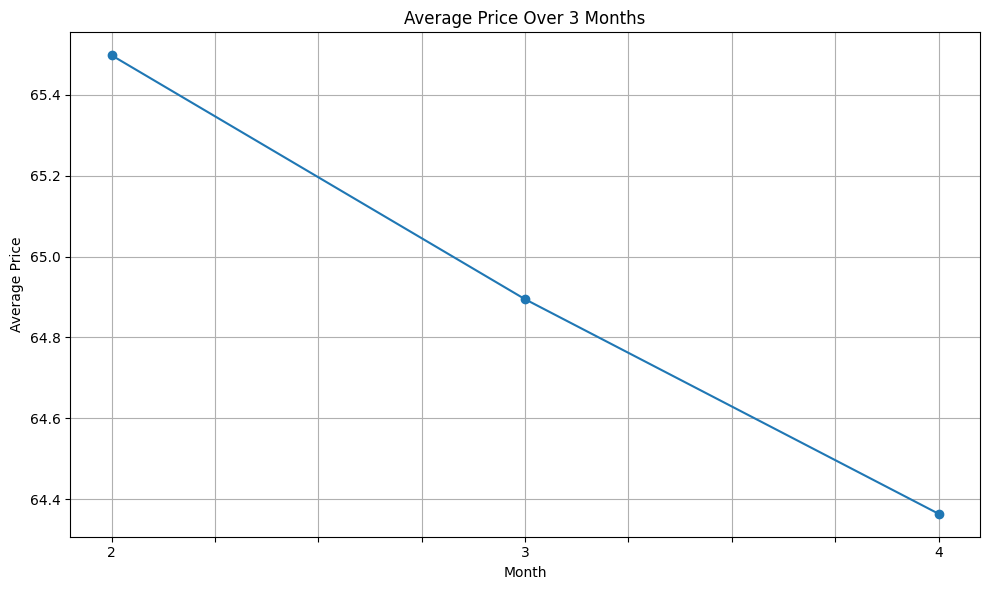

In [62]:
# 1.2
df_combined['last_scraped'] = pd.to_datetime(df_combined['last_scraped'])

# Extract month from date
df_combined['month'] = df_combined['last_scraped'].dt.month.astype('category')
# Clean the 'price' column by removing commas and dollar signs
df_combined['price'] = df_combined['price'].astype(str).str.replace(',', '').str.replace('$', '')

# Convert the 'price' column to float
df_combined['price'] = df_combined['price'].astype(float)
# Continue with the previous steps to calculate the monthly average price

# Group by month and calculate average price
monthly_avg_price = df_combined.groupby('month')['price'].mean()

# Plotting
plt.figure(figsize=(10, 6))
monthly_avg_price.plot(marker='o', linestyle='-')

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average Price Over 3 Months')

# Show grid
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

df_combined.to_csv(output_csv_path, index=False)



In [52]:
# Define the list of file paths with directory prefix
file_paths = ['data/2019/april/listings.csv', 'data/2019/april/listings0.csv',
               'data/2019/april/reviews.csv', ]

# Define the columns to check (excluding 'id')
columns_to_check = ['price', 'minimum_nights', 'zipcode', 'transit', 'cancellation_policy', 'bedrooms', 'beds',
                    'review_scores_rating', 'number_of_reviews', 'neighbourhood', 'name', 'latitude', 'longitude',
                    'last_review', 'instant_bookable', 'host_since', 'host_response_rate', 'host_identity_verified',
                    'host_has_profile_pic', 'first_review', 'description', 'city', 'bed_type', 'bathrooms',
                    'accommodates', 'amenities', 'room_type', 'property_type', 'availability_365']

# Read the data from each file into a dictionary of DataFrames
dfs = {}
for file_path in file_paths:
    df_name = file_path.split('/')[-1].split('.')[0]  # Extracting DataFrame name from file path
    dfs[df_name] = pd.read_csv(file_path)

# Initialize a list to store inconsistencies
inconsistencies = []

# Helper function to normalize value for comparison
def normalize_value(value):
    if isinstance(value, str):
        value = value.strip()  # Remove leading/trailing whitespaces for strings
        if value.startswith('$'):
            value = value[1:]  # Remove leading currency symbol
        if '.' in value:
            value = value.rstrip('0').rstrip('.')  # Remove trailing zeros and decimal point
        return value
    elif isinstance(value, float):
        return round(value, 2)  # Round float values to 2 decimal places
    else:
        return value  # Return other types unchanged

# Iterate over the 'id' column in the 'listings.csv' DataFrame
for idx, row in dfs['listings'].iterrows():
    listing_id = row['id']  # Get the id from 'listings.csv'
    # Iterate over other DataFrames to check corresponding values for this id
    for df_name, df in dfs.items():
        if df_name != 'listings':  # Exclude 'listings.csv' itself
            # Check if the id exists in the current DataFrame
            if 'id' in df.columns and listing_id in df['id'].values:
                # Get the row with the matching id
                matching_row = df[df['id'] == listing_id].iloc[0]
                # Compare values of columns_to_check
                for column in columns_to_check:
                    if column in row and column in matching_row:
                        value1 = normalize_value(row[column])
                        value2 = normalize_value(matching_row[column])
                        if value1 != value2:
                            # Append the inconsistency to the list
                            inconsistencies.append((listing_id, column, df_name, value1, value2))

# Print any inconsistencies found
if inconsistencies:
    print("Inconsistencies found:")
    for inconsistency in inconsistencies:
        print(f"ID: {inconsistency[0]}, Column: {inconsistency[1]}, File: {inconsistency[2]}")
        print(f"  Value in listings.csv: {inconsistency[3]}")
        print(f"  Value in {inconsistency[2]}: {inconsistency[4]}")
else:
    print("No inconsistencies found.")


C:\Users\Erik Kajacka\AppData\Local\Temp\ipykernel_11152\3042136293.py:16: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs[df_name] = pd.read_csv(file_path)


Inconsistencies found:
ID: 10595, Column: price, File: listings0
  Value in listings.csv: 73
  Value in listings0: 73
ID: 10595, Column: neighbourhood, File: listings0
  Value in listings.csv: Ambelokipi
  Value in listings0: ΑΜΠΕΛΟΚΗΠΟΙ
ID: 10988, Column: price, File: listings0
  Value in listings.csv: 82
  Value in listings0: 82
ID: 10988, Column: neighbourhood, File: listings0
  Value in listings.csv: Ambelokipi
  Value in listings0: ΑΜΠΕΛΟΚΗΠΟΙ
ID: 10990, Column: price, File: listings0
  Value in listings.csv: 49
  Value in listings0: 49
ID: 10990, Column: neighbourhood, File: listings0
  Value in listings.csv: Ambelokipi
  Value in listings0: ΑΜΠΕΛΟΚΗΠΟΙ
ID: 10993, Column: price, File: listings0
  Value in listings.csv: 38
  Value in listings0: 38
ID: 10993, Column: neighbourhood, File: listings0
  Value in listings.csv: Ambelokipi
  Value in listings0: ΑΜΠΕΛΟΚΗΠΟΙ
ID: 10995, Column: price, File: listings0
  Value in listings.csv: 49
  Value in listings0: 49
ID: 10995, Column: nei

In [53]:
# 1.3

# xazo to na katharisoume ta (Athens, Attiki, Greece),(Athens, Attika, Greece) ή (Athina, Attika), (Αθήνα, Attikhs) AFOU 
# DEN EINAI GEITONIES RE PANAGIOTAKI KAI DEN TA EXOUME AUTA GTXM
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.reset_option('display.max_rows')
#pd.reset_option('display.max_columns')
neighbourhood_reviews = df_combined.groupby('neighbourhood')['number_of_reviews'].sum()

neighbourhood_reviews_sorted = neighbourhood_reviews.sort_values(ascending=False)

# Select the top 5 neighbourhoods
top_5_neighbourhoods = neighbourhood_reviews_sorted.head()

# Print the result
print(top_5_neighbourhoods)



neighbourhood
Plaka           132361
Koukaki          90357
Neos Kosmos      83348
Psyri            54353
Metaxourgeio     44792
Name: number_of_reviews, dtype: int64


In [54]:
# 1.4
df_combined['last_scraped'] = pd.to_datetime(df_combined['last_scraped'])

# Extract month from date
df_combined['month'] = df_combined['last_scraped'].dt.month.astype('float')

properties = df_combined.groupby(['neighbourhood','month'])['id'].nunique()

neighborhood_total_counts = properties.groupby('neighbourhood').sum()

max_property = neighborhood_total_counts.idxmax()
max_number = neighborhood_total_counts.max()
print(max_property,max_number)
#number_of_properties = properties.value_counts().idxmax()

Plaka 3143


In [55]:
# 1.5
df_combined['last_scraped'] = pd.to_datetime(df_combined['last_scraped'])

# Extract month from date
df_combined['month'] = df_combined['last_scraped'].dt.month.astype('float')

neighborhood_month_counts = df_combined.groupby(['neighbourhood', 'month'])['id'].nunique()
neighborhood_total_counts = neighborhood_month_counts.groupby('neighbourhood').sum()
#kataxoriseis ana geitonia(diaforetikes mallon?)
neighborhood_total_counts

neighborhood_month_id_counts = df_combined.groupby('month')['id'].count()

print(neighborhood_month_id_counts)

month
2.0    9100
3.0    9361
4.0    9661
Name: id, dtype: int64


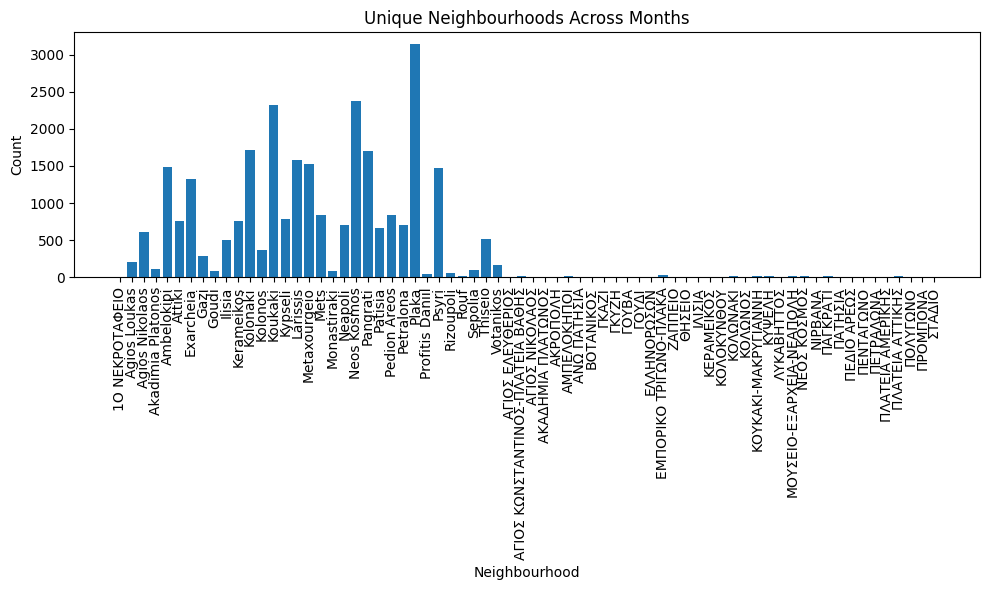

In [57]:
# 1.6
# Group the data by 'neighbourhood' and 'month' and count the number of unique neighborhoods
# unique_neighborhoods = df_combined.groupby(['neighbourhood', 'month'])['id'].size()
# unique_neighborhoods
# thelw na pethano den kanw plaka

df_combined['last_scraped'] = pd.to_datetime(df_combined['last_scraped'])

# Extract month from date
df_combined['month'] = df_combined['last_scraped'].dt.month.astype('float')

properties = df_combined.groupby(['neighbourhood','month'])['id'].nunique()

neighborhood_total_counts = properties.groupby('neighbourhood').sum()
# Plot histogram
plt.figure(figsize=(10, 6))
plt.bar(neighborhood_total_counts.index.get_level_values('neighbourhood'), neighborhood_total_counts)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Set labels and title
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.title('Unique Neighbourhoods Across Months')

# Show the plot
plt.tight_layout()
plt.show()



In [58]:
# 1.7.
## NOMIZO META THA THELEI KAPOS NA EPANAFEREIS TA DIPLA STO DF ISOS KSANADIABAZONTAS TO ARXEIO KAI PERNONTAS TO STO IDIO df_combined
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df_combined.drop_duplicates(subset=['id'])
room_type_counts = df_combined.groupby('neighbourhood')['room_type'].value_counts()


most_common_room_type = room_type_counts.groupby('neighbourhood').nlargest(1).reset_index(level=1, drop=True)
# result = room_type_counts.groupby('neighbourhood').idxmax()
# result = result.reset_index(level = 0, drop = True)
# print(result)
print(most_common_room_type)



neighbourhood                     room_type      
1Ο ΝΕΚΡΟΤΑΦΕΙΟ                    Entire home/apt       2
Agios Loukas                      Entire home/apt     177
Agios Nikolaos                    Entire home/apt     524
Akadimia Platonos                 Entire home/apt      92
Ambelokipi                        Entire home/apt    1386
Attiki                            Entire home/apt     647
Exarcheia                         Entire home/apt    1171
Gazi                              Entire home/apt     240
Goudi                             Entire home/apt      63
Ilisia                            Entire home/apt     473
Kerameikos                        Entire home/apt     682
Kolonaki                          Entire home/apt    1615
Kolonos                           Entire home/apt     321
Koukaki                           Entire home/apt    2104
Kypseli                           Entire home/apt     645
Larissis                          Entire home/apt    1276
Metaxourgeio          

In [64]:
# 1.8
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
new_file_path = 'data_train/train_2019.csv'

new_columns = ['id', 'zipcode', 'transit', 'bedrooms', 'beds', 'review_scores_rating', 'number_of_reviews',
               'neighbourhood', 'name', 'latitude', 'longitude', 'last_review', 'instant_bookable', 'host_since',
               'host_identity_verified', 'host_has_profile_pic', 'first_review', 'description',
               'city', 'cancellation_policy', 'bed_type', 'bathrooms', 'accommodates', 'amenities', 'room_type',
               'property_type', 'price', 'availability_365', 'minimum_nights','last_scraped']


data = pd.read_csv(new_file_path, usecols=new_columns)
df_combined = pd.DataFrame(data)

most_expensive = df_combined.groupby('room_type')['price'].value_counts()
most_expensive_type = most_expensive.groupby('room_type').sum()

result0 = 0
result1 = 0
result2 = 0


for price_count  in most_expensive.items():
    if price_count[0][0] == 'Entire home/apt':
        result0 = result0 +  price_count[0][1] * price_count[1]

    if price_count[0][0] == 'Shared room':
        result1 = result1 +  price_count[0][1] * price_count[1]
    
    if price_count[0][0] == 'Private room':
        result2 = result2 +  price_count[0][1] * price_count[1]

if result0 > result1:
    if result0 > result2:
        print('Entire home/apt',result0,'$')
    elif result0 < result2:
        print('Private room',result2,'$')
elif result1 > result0:
    print('Shared room',result1,'$')
    
    

Entire home/apt 1561879.0 $
